In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from utils import forecast_accuracy
from utils import test_stationary
from utils import read_oil_price
from utils import components_decomposition
from utils import time_series_regression
from utils import time_series_regression_w_testing

from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6


In [2]:
# dataset = read_oil_price()
dataset = pd.read_csv('oilprice.csv')
dataset.head()

,oil.price
0,22.93
1,15.45
2,12.61
3,12.84
4,15.38


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(np.array(dataset.index).reshape((-1,1)), dataset['oil.price'])

In [ ]:
pred = model.predict(np.array(dataset.index).reshape((-1,1)))

In [ ]:
dataset = read_oil_price()

In [ ]:
pred = pd.DataFrame(data = pred, index = dataset.index, columns = ['Predictions'])

In [ ]:
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.plot(dataset, c = 'b')
plt.plot(pred, c = 'r')
plt.show()

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# dataset = read_oil_price()
dataset = pd.read_csv('oilprice.csv')
dataset.head()

,oil.price
0,22.93
1,15.45
2,12.61
3,12.84
4,15.38


In [17]:
preds = time_series_regression(dataset, 4)

Training order:  1
Training order:  2
Training order:  3
Training order:  4


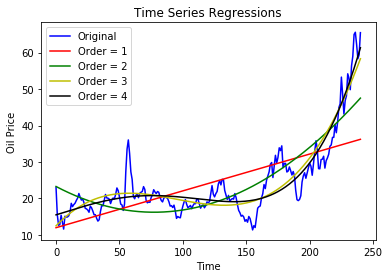

In [18]:
colors = ['r', 'g', 'y', 'k', 'c']
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.plot(dataset, c = 'b', label = 'Original')
for i, pred in enumerate(preds):
    plt.plot(pred, c = colors[i], label = 'Order = {}'.format(i + 1))
plt.title('Time Series Regressions')
plt.legend(loc='best')
plt.show()

## Training and Testing up to Jan

In [25]:
train = dataset[:-13]
test = dataset[-13:]

In [26]:
preds = time_series_regression_w_testing(train,test, 4)

Training order:  1
Training order:  2
Training order:  3
Training order:  4


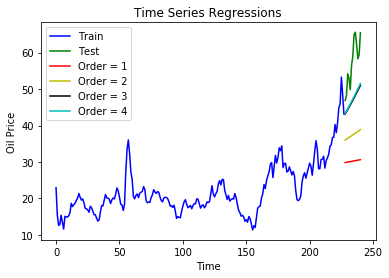

In [27]:
colors = ['r', 'y', 'k', 'c']
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.plot(train, c = 'b', label = 'Train')
plt.plot(test, c = 'g', label = 'Test')

for i, pred in enumerate(preds):
    plt.plot(pred, c = colors[i], label = 'Order = {}'.format(i + 1))
plt.title('Time Series Regressions')
plt.legend(loc='best')
plt.show()

In [28]:
forecast_accuracy(preds[-1]['Predictions'], test['oil.price'])

{'mape': 0.16630635956677361,
 'me': -9.854227353733837,
 'mae': 9.854227353733837,
 'mpe': -0.16630635956677361,
 'rmse': 10.78281941962196,
 'acf1': 0.5221734495222445,
 'corr': 0.8260119311080701,
 'minmax': 0.16630635956677375}

## Training and Testing up to Jul

In [22]:
train = dataset[:-7]
test = dataset[-7:]

In [23]:
preds = time_series_regression_w_testing(train,test, 4)

Training order:  1
Training order:  2
Training order:  3
Training order:  4


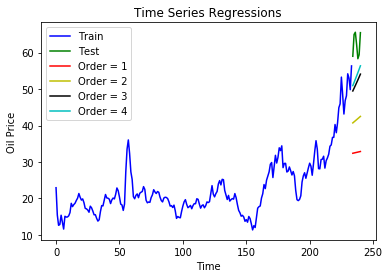

In [24]:
colors = ['r', 'y', 'k', 'c']
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.plot(train, c = 'b', label = 'Train')
plt.plot(test, c = 'g', label = 'Test')

for i, pred in enumerate(preds):
    plt.plot(pred, c = colors[i], label = 'Order = {}'.format(i + 1))
plt.title('Time Series Regressions')
plt.legend(loc='best')
plt.show()

In [29]:
forecast_accuracy(preds[-1]['Predictions'], test['oil.price'])

{'mape': 0.16630635956677361,
 'me': -9.854227353733837,
 'mae': 9.854227353733837,
 'mpe': -0.16630635956677361,
 'rmse': 10.78281941962196,
 'acf1': 0.5221734495222445,
 'corr': 0.8260119311080701,
 'minmax': 0.16630635956677375}